<a href="https://colab.research.google.com/github/djdbswjd2/2024-hightech/blob/main/%EA%B0%80%EC%83%81%ED%99%94%ED%8F%90_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 2.6 MB/s eta 0:00:00


In [2]:
import pyupbit
import sqlite3
import datetime

conn = sqlite3.connect(r'경로\upbit.db')
cur = conn.cursor()

cur.execute("CREATE TABLE IF NOT EXISTS BTC_KRW (time TEXT, price INTEGER)")

price = pyupbit.get_current_price("KRW-BTC")
now = datetime.datetime.now()

print(now, price)

cur.execute("INSERT INTO BTC_KRW (time, price) VALUES (?, ?)", (now, price))
conn.commit()

conn.close()

2024-04-18 06:10:48.618026 90400000.0


In [3]:
import pyupbit
import sqlite3
import datetime
import time

conn = sqlite3.connect(r'경로\upbit.db')
cur = conn.cursor()

cur.execute("CREATE TABLE IF NOT EXISTS BTC_KRW (time TEXT, price INTEGER)")

In [4]:
while True:
  try:
    price = pyupbit.get_current_price("KRW-BTC")
    now = datetime.datetime.now()

    print(now, price)

    cur.execute("INSERT INTO BTC_KRW (time, price) VALUES (?, ?)", (now, price))
    conn.commit()

    time.sleep(10)

  except Exception as e:
    print(e)
    time.sleep(1)

conn.close()

2024-04-18 06:10:49.536233 90419000.0
2024-04-18 06:11:00.434004 90420000.0
2024-04-18 06:11:11.362293 90417000.0
2024-04-18 06:11:22.296311 90450000.0
2024-04-18 06:11:33.144755 90450000.0
2024-04-18 06:11:43.980973 90491000.0
2024-04-18 06:11:54.909284 90499000.0
2024-04-18 06:12:05.758438 90491000.0
2024-04-18 06:12:16.611810 90492000.0
2024-04-18 06:12:27.500836 90500000.0
2024-04-18 06:12:38.359549 90581000.0
2024-04-18 06:12:49.270664 90500000.0


KeyboardInterrupt: 

In [5]:
import sqlite3

conn = sqlite3.connect(r'경로\upbit.db')
cur = conn.cursor()

cur.execute("SELECT * FROM BTC_KRW")
rows = cur.fetchall()

for row in rows:
  print(row)

conn.close()

('2024-04-18 06:10:48.618026', 90400000)
('2024-04-18 06:10:49.536233', 90419000)
('2024-04-18 06:11:00.434004', 90420000)
('2024-04-18 06:11:11.362293', 90417000)
('2024-04-18 06:11:22.296311', 90450000)
('2024-04-18 06:11:33.144755', 90450000)
('2024-04-18 06:11:43.980973', 90491000)
('2024-04-18 06:11:54.909284', 90499000)
('2024-04-18 06:12:05.758438', 90491000)
('2024-04-18 06:12:16.611810', 90492000)
('2024-04-18 06:12:27.500836', 90500000)
('2024-04-18 06:12:38.359549', 90581000)
('2024-04-18 06:12:49.270664', 90500000)


In [6]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

conn = sqlite3.connect(r'경로\upbit.db')

query = 'SELECT * FROM BTC_KRW'

cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

선 그래프

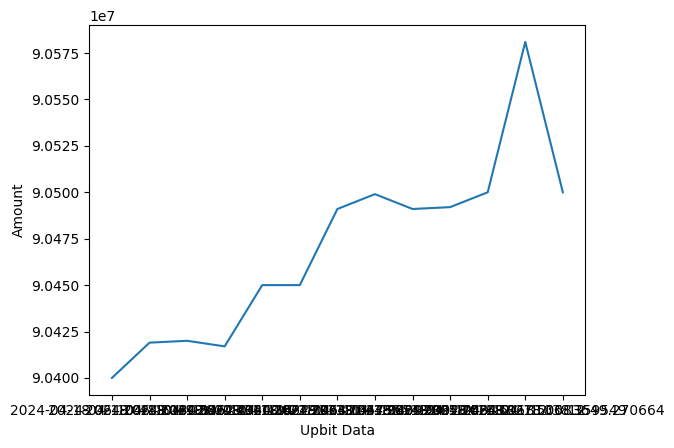

In [7]:
dates = [row[0] for row in rows]
amounts = [row[1] for row in rows]

fig, ax = plt.subplots()
ax.plot_date(dates, amounts, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_xlabel('Upbit Data')
plt.show()

conn.close()

막대 그래프

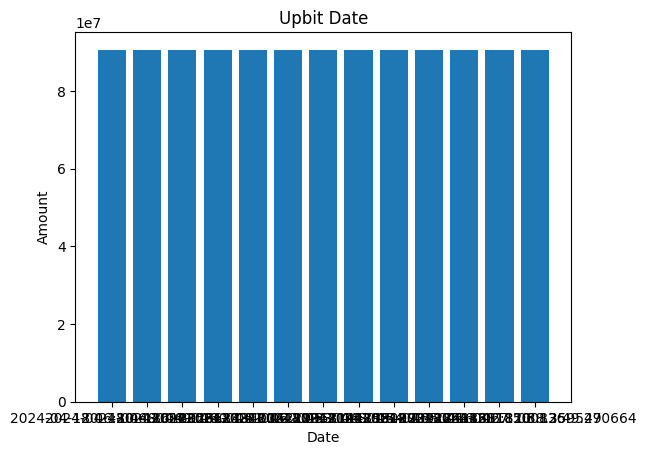

In [8]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect(r'경로\upbit.db')

query = 'SELECT * FROM BTC_KRW'

cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

dates = [row[0] for row in rows]
amounts = [row[1] for row in rows]

fig, ax = plt.subplots()
ax.bar(dates, amounts)
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title('Upbit Date')
plt.show()

conn.close()

산점도 그래프

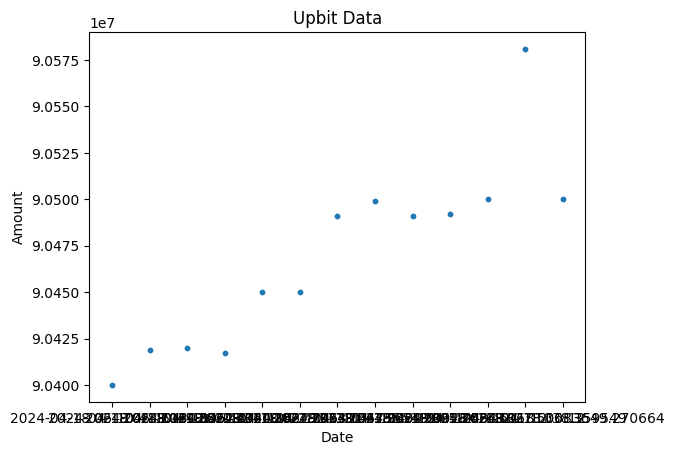

In [9]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect(r'경로\upbit.db')

query = 'SELECT * FROM BTC_KRW'

cur = conn.cursor()
cur.execute(query)
rows = cur.fetchall()

dates = [row[0] for row in rows]
amounts = [row[1] for row in rows]

fig, ax = plt.subplots()
ax.scatter(dates, amounts, s=10)
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.set_title('Upbit Data')
plt.show()

conn.close()